In [56]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import torch
import torch.optim as optim
from sklearn.metrics import r2_score

# 데이터 로딩

In [7]:
df = pd.read_csv('C:\\ML\\kaggle\\data\\advertising.csv')

In [11]:
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


# 상관관계 파악하기

In [13]:
df.corr()

,TV,Radio,Newspaper,Sales
TV,1.000000,0.054809,0.056648,0.901208
Radio,0.054809,1.000000,0.354104,0.349631
Newspaper,0.056648,0.354104,1.000000,0.157960
Sales,0.901208,0.349631,0.157960,1.000000


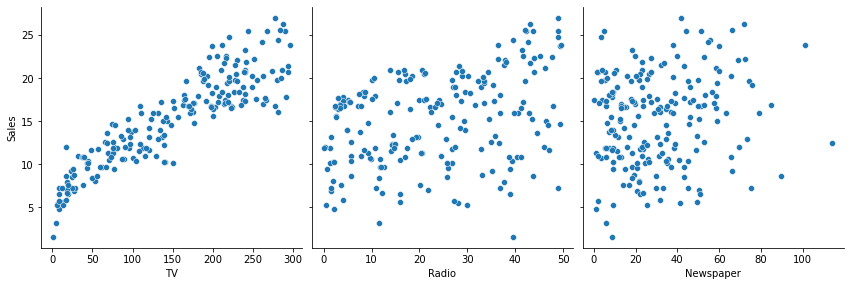

In [17]:
sns.pairplot(df, x_vars = ['TV', 'Radio', 'Newspaper'], y_vars = ['Sales'], height = 4)

* TV와 판매간에는 강한 상간관계가 있음을 알 수 있음
* TV와 Sales의 관계를 선형으로 모델링 가능

In [78]:
x_data = torch.FloatTensor(df['TV'])
y_data = torch.FloatTensor(df['Sales'])

print(x_data.shape)
print(y_data.shape)

# 데이터 사이즈 변경

x_data = x_data.view(-1,1)
y_data = y_data.view(-1,1)

print(x_data.shape)
print(y_data.shape)

# 학습 데이터, 검증 데이터 분리

x_train, x_val, y_train, y_val = train_test_split(x_data, y_data, test_size = 0.2, random_state = 2022)

torch.Size([200])
torch.Size([200])
torch.Size([200, 1])
torch.Size([200, 1])


In [79]:
W = torch.zeros(1, requires_grad = True)
b = torch.zeros(1, requires_grad = True)

optimizer = optim.SGD([W,b], lr=0.00001)
nb_epochs = 100

for i in range(1,nb_epochs+1):
    h = x_train*W + b
    cost = torch.mean((h-y_train)**2)
    
    optimizer.zero_grad()
    cost.backward()
    optimizer.step()

In [80]:
y_pred = torch.squeeze(x_val*W+b).tolist()
y_val = torch.squeeze(y_val).tolist()

In [82]:
score = r2_score(y_val,y_pred)
print(score)

0.5306269730546029


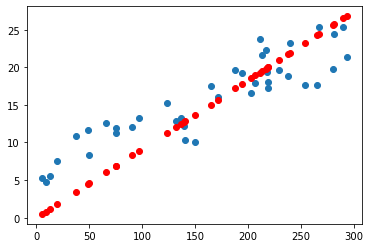

In [83]:
plt.scatter(x_val, y_val)
plt.scatter(x_val, y_pred, color='r')
plt.show()